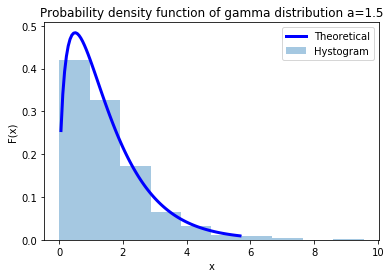

EX= 1.5  STD= 1.224744871391589  DX= 1.4999999999999998
matimatical exp= 1.5
sigma= 0.547722557505
matimatical exp= 1.5
sigma= 0.387298334621
matimatical exp= 1.5
sigma= 0.173205080757


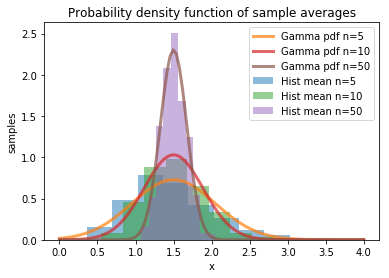

In [28]:
#Гамма-распределение

import scipy.stats as sts
from scipy.stats import gamma
import matplotlib.pyplot as plt
import numpy as np
import math

fig, ax = plt.subplots(1, 1)
#Зададим параметры гамма-распределения
a = 1.5
r = gamma.rvs(a, size=1000)

#Построим гистограмму
ax.hist(r, density=True, histtype='stepfilled', alpha=0.4, label='Hystogram')

#Построем теоретическое распределение
x = np.linspace(gamma.ppf(0.01, a), gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a), 'b-', lw=3, label='Theoretical')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.title('Probability density function of gamma distribution a=1.5')
ax.legend(frameon=True)
plt.show()

#Функция для вычисления распределений выборочных средних при различных n
def cmt_gamma (n, Ex, Dx):
    values = np.array([gamma.rvs(a, size=n) for x in range(1000)])

    #Вычислим выборочные средние
    meanVal = values.mean(axis = 1)
    plt.hist(meanVal, normed=True, alpha=0.5, label='Hist mean n=' + str(n))
    
    #Вычислим матем. ожидание м и среднеквадратичное отклонение sigma нормального распределения
    mu = Ex
    sigma = math.sqrt(Dx/n)
    print 'matimatical exp=' , mu
    print 'sigma=' , sigma
    # зададим нормальное распределенние
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,4,100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf,  lw=3, alpha=0.7, label='Gamma pdf n=' + str(n))
    plt.ylabel('samples')
    plt.xlabel('x')
    plt.title('Probability density function of sample averages')
    plt.legend(loc='best')

#Подсчитаем теоретическое среднее для генеральной совокупности, среднеквадратическое отклонение и дисперсию    
EX = gamma.mean(a)
std = gamma.std(a)
DX = std**2
print 'EX=', EX, ' STD=', std, ' DX=', DX

#Построение графиков норм. распр. выборочных средних
cmt_gamma (5,EX,DX)
cmt_gamma (10,EX,DX)
cmt_gamma (50,EX,DX)

#ВЫВОДЫ
#1.Распределение выборочных средних даже для гамма-распределения - нормальное с средним = среднему
#генеральной совокупности (гамма-распределения).
#2.Чем больше размер выборки - тем лучше распределение выб. средн. апроксимируется норм. распр.
#3.Голова идет кругом от обилия новых функций (от начала изучения Питона)